<a href="https://colab.research.google.com/github/zidniilma19/Tugas-K---Means/blob/main/K_means_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing





In [ ]:
home_data=  pd.read_csv('https://raw.githubusercontent.com/yanims/PYTN/master/Data/housing.csv',
                        usecols = ['longitude', 'latitude' ,'median_house_value'])

home_data

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0
...,...,...,...
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0


<Axes: xlabel='longitude', ylabel='latitude'>

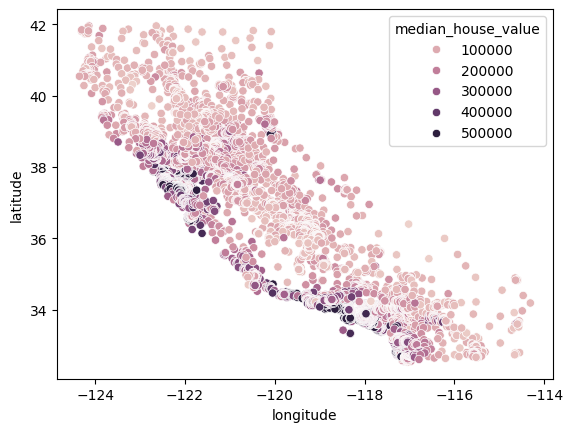

In [ ]:
sns.scatterplot(data = home_data, x = 'longitude' ,y = 'latitude', hue = 'median_house_value')

In [ ]:
x = home_data [['longitude','latitude']]
y = home_data [['median_house_value']]


In [ ]:
x

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
x_norm = preprocessing.normalize(x)
x_norm

array([[-0.9551823 ,  0.29601821],
       [-0.95521964,  0.29589769],
       [-0.9552554 ,  0.29578221],
       ...,
       [-0.95095679,  0.30932376],
       [-0.95103176,  0.30909316],
       [-0.95111014,  0.30885191]])

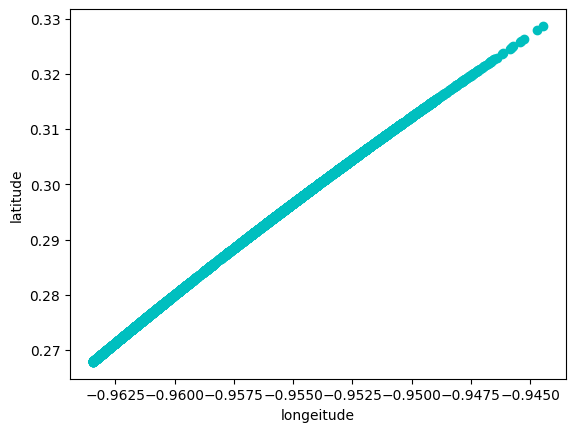

In [ ]:
plt.scatter(x=x_norm[:,0],
            y=x_norm[:,1],
            c = "c",
            marker = "o")
plt.xlabel('longeitude')
plt.ylabel('latitude')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state= 0)
kmeans.fit(x_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
print(kmeans.cluster_centers_)

[[-0.96115309  0.2759971 ]
 [-0.95563054  0.29455219]
 [-0.95179215  0.30669856]]


In [ ]:
print(kmeans.labels_)

[1 1 1 ... 2 2 2]


In [ ]:
home_data["klaster"]= kmeans.labels_
home_data

,longitude,latitude,median_house_value,klaster
0,-122.23,37.88,452600.0,1
1,-122.22,37.86,358500.0,1
2,-122.24,37.85,352100.0,1
3,-122.25,37.85,341300.0,1
4,-122.25,37.85,342200.0,1
...,...,...,...,...
20635,-121.09,39.48,78100.0,2
20636,-121.21,39.49,77100.0,2
20637,-121.22,39.43,92300.0,2
20638,-121.32,39.43,84700.0,2


<Axes: xlabel='longitude', ylabel='latitude'>

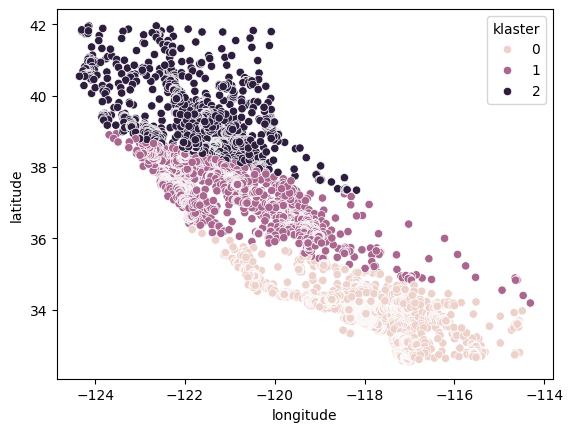

In [ ]:
sns.scatterplot(data = home_data, x = 'longitude' ,y = 'latitude', hue = 'klaster')

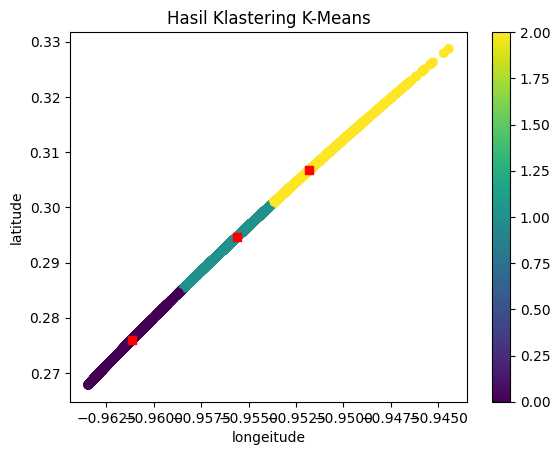

In [ ]:
output = plt.scatter(x=x_norm[:,0],
            y=x_norm[:,1],
            c = home_data.klaster,
            marker = "o")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],
            c = "red",
            marker = "s")
plt.title("Hasil Klastering K-Means")
plt.colorbar (output)
plt.xlabel('longeitude')
plt.ylabel('latitude')
plt.show()

<Axes: ylabel='median_house_value'>

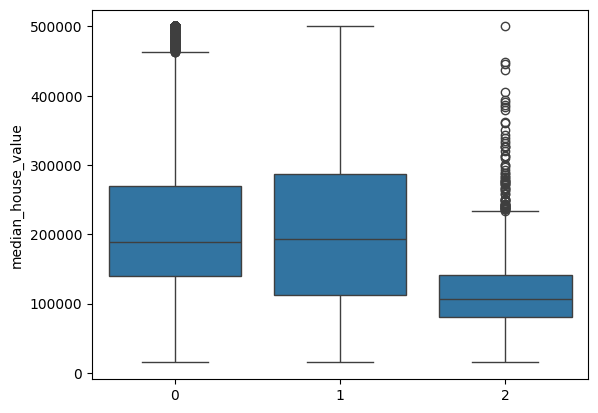

In [ ]:
sns.boxplot(x = kmeans.labels_, y = y['median_house_value'])

In [ ]:
silhouette_score(x_norm, kmeans.labels_, metric='euclidean')

0.7499115323549778

In [ ]:
K = range(2, 8)
fits = []
score = []

for k in K:
  model = KMeans(n_clusters = k,random_state = 0,n_init='auto').fit(x_norm)
  fits.append(model)
  score.append(silhouette_score(x_norm, model.labels_,metric= 'euclidean'))

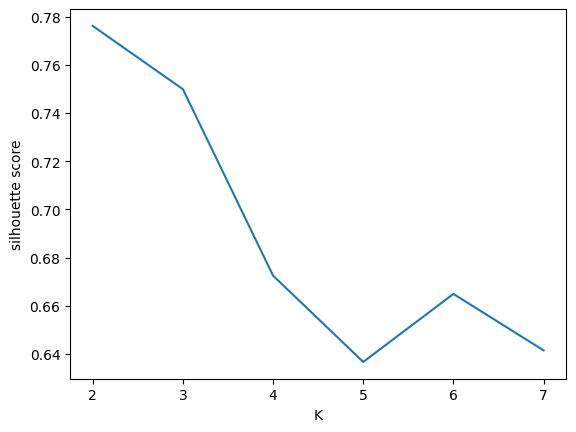

In [ ]:
sns.lineplot(x = K, y = score)
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()